In [5]:
import geopandas as gpd

from features.income import Income
from features.violence_calls import ViolenceCalls
from features.households import Households
from features.population import Population
from features.population_density import PopulationDensity
from features.feature_constructor import Feature
from features.out_of_state_rental_ownership import OutOfStateRentalOwnership
from features.ddot_bus_stops import DDotBusStops
from features.smart_bus_stops import SmartBusStops
from features.rental_statuses import RentalStatuses
from features.project_green_light_locations import ProjectGreenlightLocations
from features.rms_crime import RmsCrime
from util_detroit import concatenate_features

from detroit_geos import get_detroit_census_geos, get_detroit_boundaries
from munge_features import transform_1
from detroit_geos import nice_detroit_plot, attach_polygons

# import patsy
# from patsy import dmatrices, dmatrix
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import seaborn as sns
# from sklearn.impute import SimpleImputer

blocks = get_detroit_census_geos(decennial_census_year=2010,target_geo_grain='block',).set_index('geo_id')
tracts = get_detroit_census_geos(decennial_census_year=2010,target_geo_grain='tract',).set_index('geo_id')
detroit = get_detroit_boundaries()

In [6]:
target_geo_grain = "tract"
feature_objects = [
    Population(
        decennial_census_year=2010, population_data_path="population", verbose=False
    ),
    PopulationDensity(
        decennial_census_year=2010,
        population_data_path="population",
    ),
    ViolenceCalls(decennial_census_year=2010, verbose=False),
    Income(verbose=False),
    Households(),
    OutOfStateRentalOwnership(2010),
    DDotBusStops(decennial_census_year=2010),
    SmartBusStops(decennial_census_year=2010),
    RentalStatuses(decennial_census_year=2010),
    ProjectGreenlightLocations(decennial_census_year=2010),
]
feat_df = concatenate_features(feature_objects,'tract')

In [4]:
transformed_df = transform_1(feat_df)

In [6]:
df = attach_polygons(transformed_df,tracts)

In [33]:
feat_df_cols = [
    "violence_calls",
    "population",
    "population_density",
    "per_household_income",
    "out_of_state_rental_ownership",
    "bus_stops",
]

feat_df.head()

,population,population_density,violence_calls,per_capita_income,per_household_income,households,married_families,non_family_households,out_of_state_rental_ownership,bus_stops,smart_bus_stops,rental_counts,greenlights
tract,,,,,,,,,,,,,
2.616350e+10,4032,1824.898354,2257.0,3369.0,49015.0,1438,249,674,0.278947,13.0,0.0,190.0,1.0
2.616350e+10,3207,1856.991606,2334.0,2834.0,61980.0,1088,190,370,0.326087,16.0,4.0,92.0,10.0
2.616350e+10,3137,1329.122055,1948.0,1900.0,50345.0,811,61,491,0.157895,17.0,4.0,76.0,8.0
2.616350e+10,1664,917.210175,1030.0,1052.0,34880.0,375,45,140,0.125000,23.0,8.0,8.0,0.0
2.616350e+10,2205,1476.359684,1450.0,1289.0,43058.0,506,61,274,0.346939,19.0,0.0,49.0,1.0


In [34]:
plot_df = pd.merge(
    df.loc[:, [x for x in df.columns if x not in feat_df_cols]],
    feat_df.loc[:, feat_df_cols],
    right_index=True,
    left_index=True,
)

In [37]:
plot_df.columns

Index(['call_rate', 'married_household_prop', 'rental_density', 'bus_density',
       'greenlight_density', 'people_per_household', 'geometry',
       'violence_calls', 'population', 'population_density',
       'per_household_income', 'out_of_state_rental_ownership', 'bus_stops'],
      dtype='object')

In [45]:
colname_map.values()

dict_values(['Gun-violence-related 911 calls/capita', 'Proportion of households married', 'Rental units per sq km', 'bus stops /km^2', 'greenlight locations/km^2', 'People per household', 'Gun-violence-related 911 calls', 'Population', 'Population density', 'Per household income', 'proportion of rental units owned out of state', 'Bus stops'])

In [3]:
colname_map

{'call_rate': 'Gun-violence-related 911 calls/capita',
 'married_household_prop': 'Proportion of households married',
 'rental_density': 'Rental units per sq km',
 'bus_density': 'bus stops /km^2',
 'greenlight_density': 'greenlight locations/km^2',
 'people_per_household': 'People per household',
 'violence_calls': 'Gun-violence-related 911 calls',
 'population': 'Population',
 'population_density': 'Population density',
 'per_household_income': 'Per household income',
 'out_of_state_rental_ownership': 'proportion of rental units owned out of state',
 'bus_stops': 'Bus stops'}

In [2]:
colname_map = dict(
    zip(
        [
            "call_rate",
            "married_household_prop",
            "rental_density",
            "bus_density",
            "greenlight_density",
            "people_per_household",
            "violence_calls",
            "population",
            "population_density",
            "per_household_income",
            "out_of_state_rental_ownership",
            "bus_stops"
        ],
        [
            "Gun-violence-related 911 calls/capita",
            "Proportion of households married",
            "Rental units per sq km",
            "bus stops /km^2",
            "greenlight locations/km^2",
            "People per household",
            "Gun-violence-related 911 calls",
            "Population",
            "Population density",
            "Per household income",
            "proportion of rental units owned out of state",
            "Bus stops"
        ],
    )
)
plot_df.rename(columns=colname_map)

NameError: name 'plot_df' is not defined

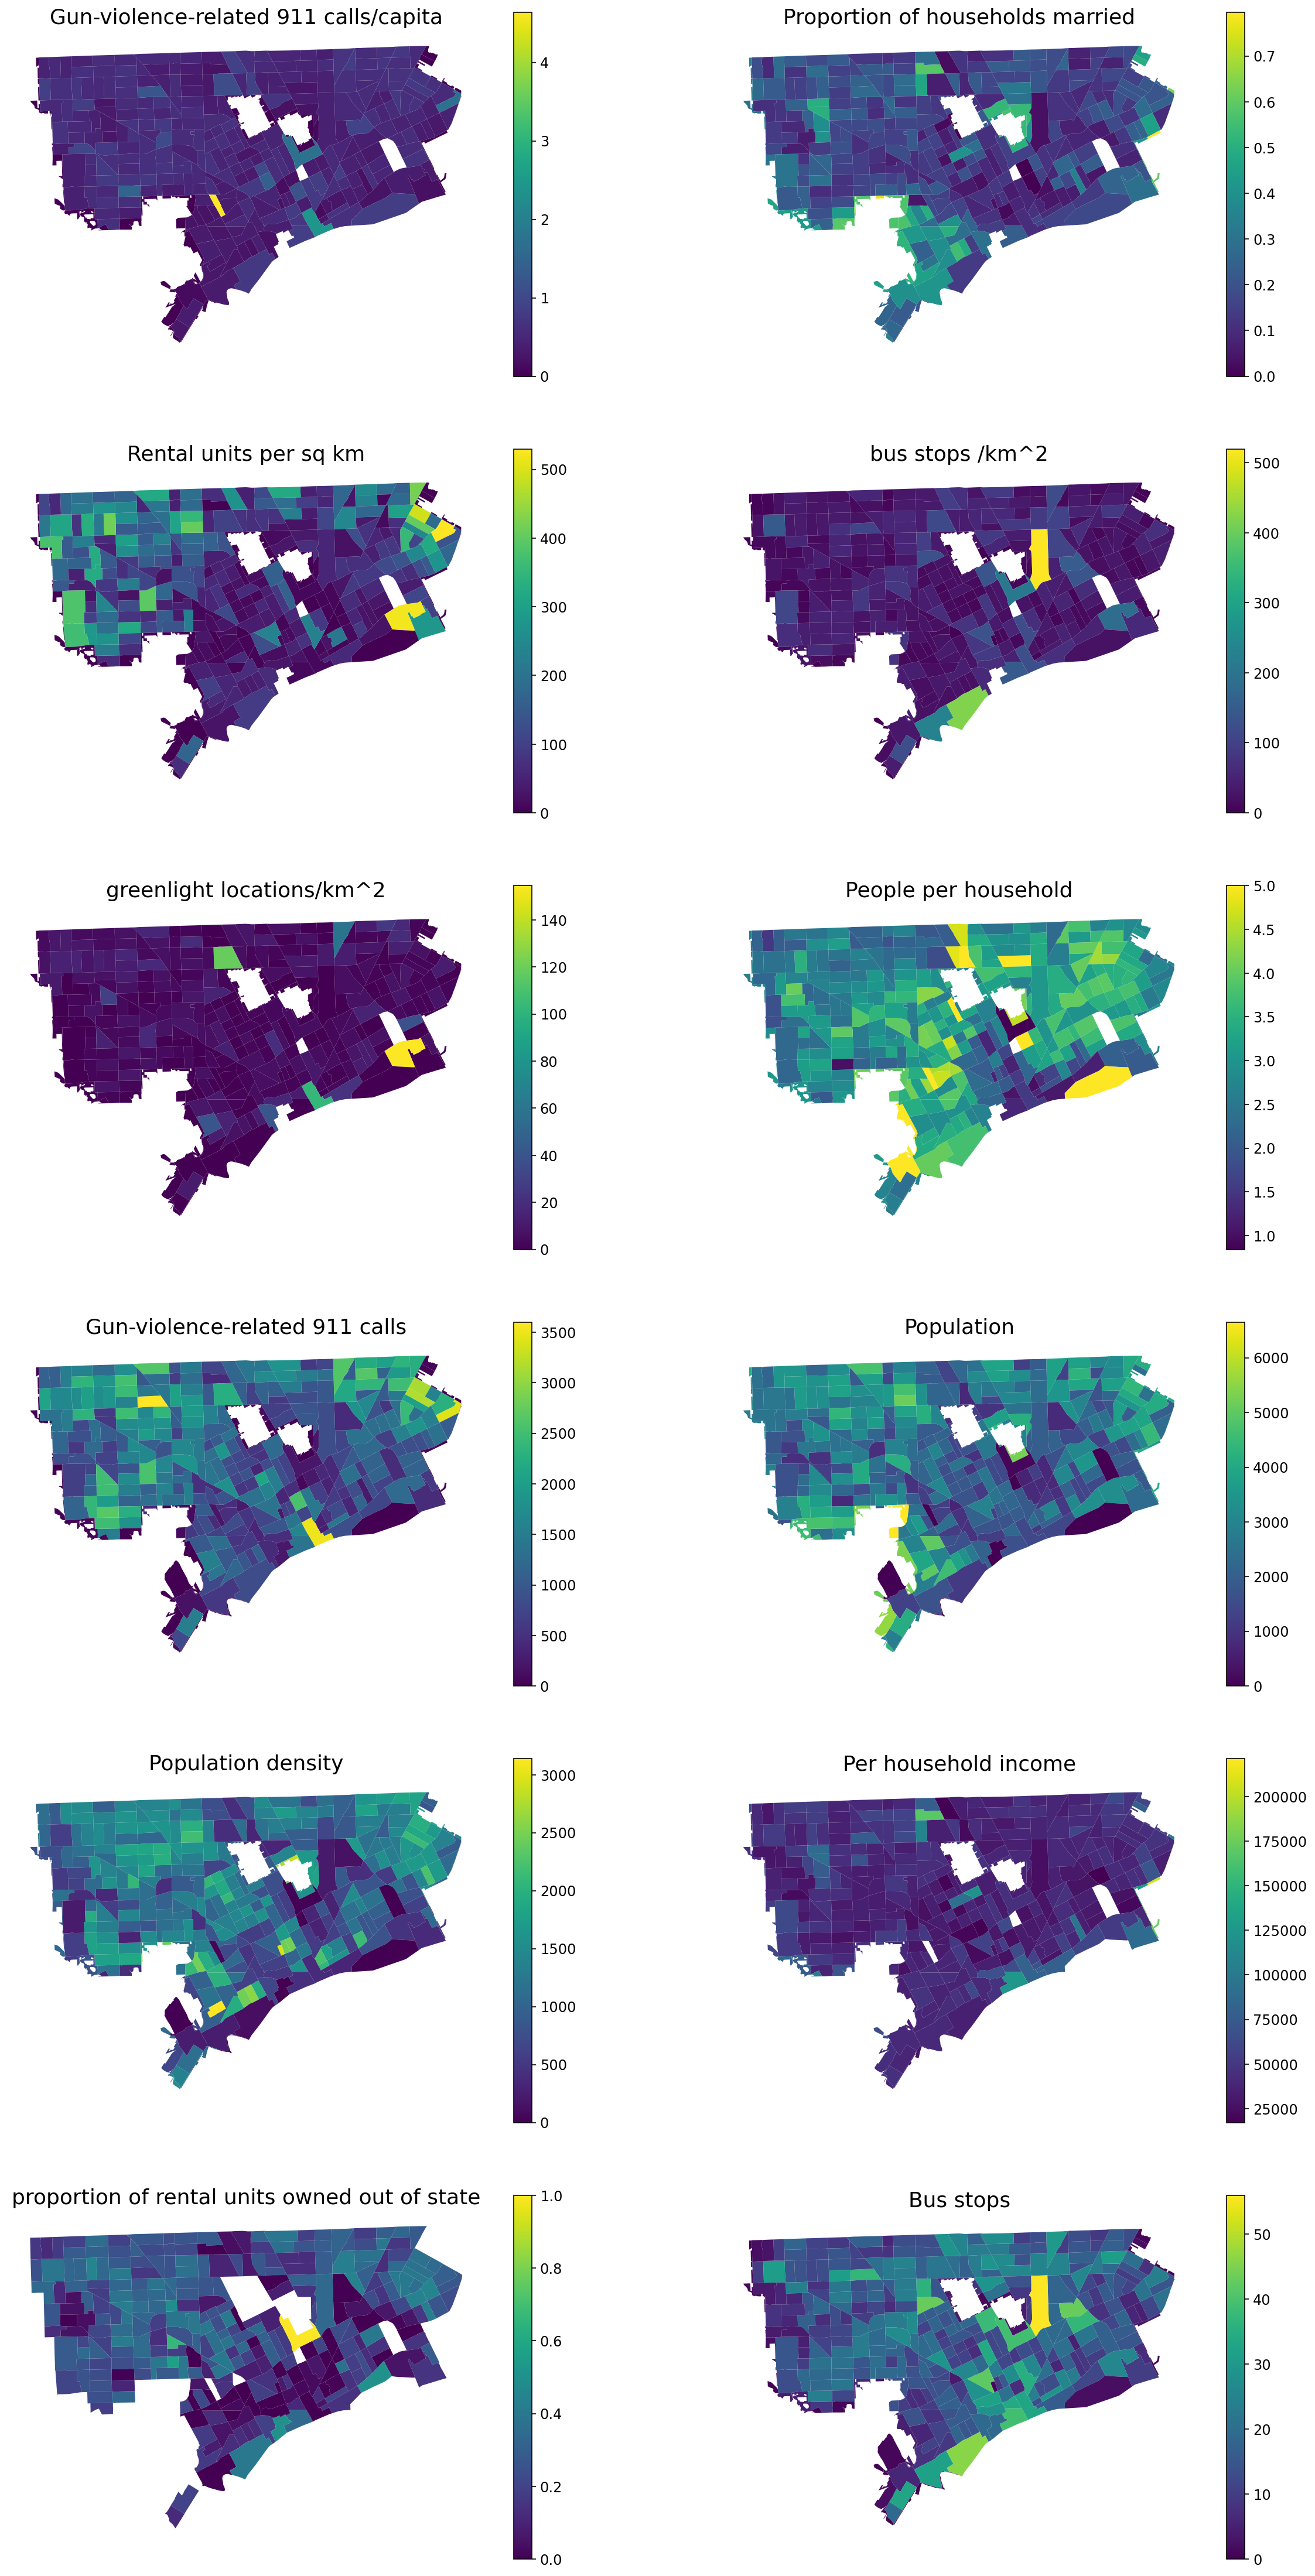

In [48]:
fig, ax = plt.subplots(6,2,figsize=(20,40))
ax = ax.ravel()

for i, c in enumerate(colname_map.values()):#enumerate([x for x in plot_df.columns if x != 'geometry']):
    nice_detroit_plot(plot_df.rename(columns=colname_map).dropna(subset=[c]),c, polygons_df=tracts,ax=ax[i])

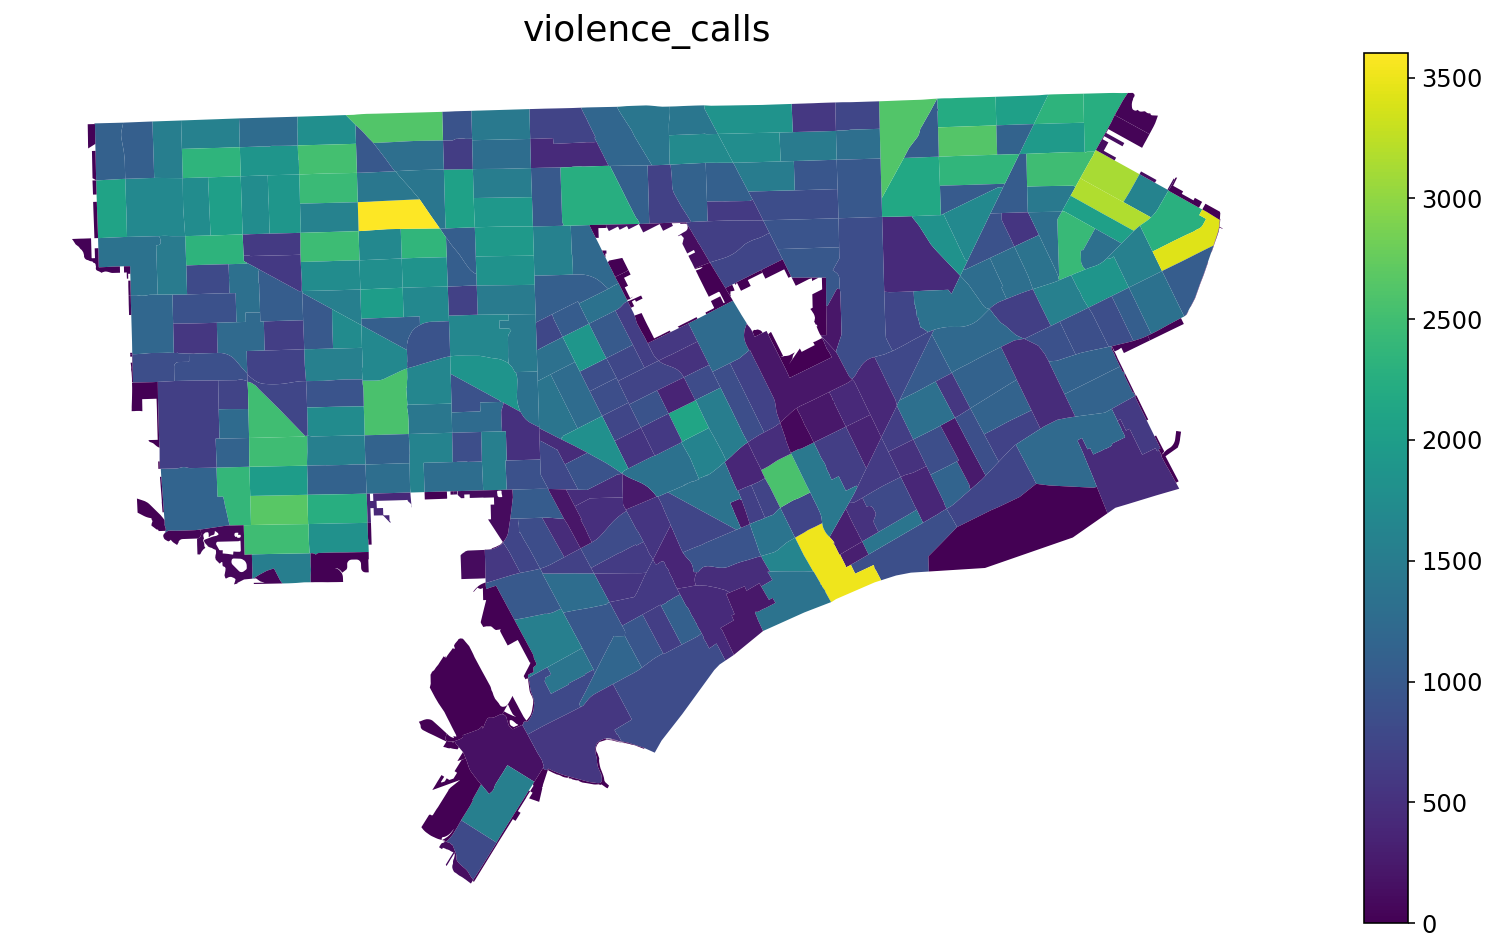

In [16]:
nice_detroit_plot(feat_df.dropna(subset=['violence_calls']),'violence_calls', polygons_df=tracts)